This code was created by Juniper Lovato juniper.lovato@uvm.edu and Parisa Suchdev parisa.suchdev@uvm.edu for the Data Science 1 Course Spring 2022

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

## 1. EDA

In [3]:
data_path = "test-labels.csv"
data_raw = pd.read_csv(data_path)
data_raw.shape

(445, 36)

In [4]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 445
Number of columns in data = 36




**Sample data:**

,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,sha1,simhash,id,domain,categories,rank,list_of_sections,Section_collect,Section_Use,Section_share
0,347334,130007,https://web.archive.org/web/20140303203130id_/...,https://web.archive.org/web/20140214091137id_/...,zenpayroll.com/privacy,https://web.archive.org/web/20140303203130id_/...,2014,A,126128,274317,...,a4e4f25fcebe339f5684dd2cada728c656e55477,14736871354175556852,130007,zenpayroll.com,business,43410.0,"this policy was last updated on may 1, 2013.\n...",0,0,0
1,347334,130007,https://web.archive.org/web/20140303203130id_/...,https://web.archive.org/web/20140214091137id_/...,zenpayroll.com/privacy,https://web.archive.org/web/20140303203130id_/...,2014,A,126128,274317,...,a4e4f25fcebe339f5684dd2cada728c656e55477,14736871354175556852,130007,zenpayroll.com,business,43410.0,collection of information and how it's used\n\...,1,1,0
2,347334,130007,https://web.archive.org/web/20140303203130id_/...,https://web.archive.org/web/20140214091137id_/...,zenpayroll.com/privacy,https://web.archive.org/web/20140303203130id_/...,2014,A,126128,274317,...,a4e4f25fcebe339f5684dd2cada728c656e55477,14736871354175556852,130007,zenpayroll.com,business,43410.0,sharing and disclosure of your information\n\n...,0,0,1
3,347334,130007,https://web.archive.org/web/20140303203130id_/...,https://web.archive.org/web/20140214091137id_/...,zenpayroll.com/privacy,https://web.archive.org/web/20140303203130id_/...,2014,A,126128,274317,...,a4e4f25fcebe339f5684dd2cada728c656e55477,14736871354175556852,130007,zenpayroll.com,business,43410.0,changing or deleting your information\n\nyou m...,0,0,0
4,347334,130007,https://web.archive.org/web/20140303203130id_/...,https://web.archive.org/web/20140214091137id_/...,zenpayroll.com/privacy,https://web.archive.org/web/20140303203130id_/...,2014,A,126128,274317,...,a4e4f25fcebe339f5684dd2cada728c656e55477,14736871354175556852,130007,zenpayroll.com,business,43410.0,"security\n\nwe employ administrative, physical...",0,0,0


In [5]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id_x                                  0
site_id                               0
homepage_snapshot_url                 0
policy_snapshot_url                   0
policy_url                            0
homepage_snapshot_redirected_url      0
year                                  0
phase                                 0
policy_text_id                        0
policy_html_id                        0
policy_reader_view_html_id            0
file_type                             0
policy_title                          4
link_text                             0
pdf_filename                        445
classifier_probability                0
analysis_subcorpus                    0
parked_domain                         0
cross_domain_homepage_redir           0
id_y                                  0
policy_text                           0
nb_of_sections                        0
flesch_kincaid                        0
smog                                 84
flesch_ease                           0


In [6]:
# policy texts with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean policy textx.
# We use axis=1 to count row-wise and axis=0 to count column wise
rowSums = data_raw.iloc[:,33:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of policy texts = ",len(data_raw))
print("Number of clean policy texts = ",clean_comments_count)
print("Number of policy texts with labels =",(len(data_raw)-clean_comments_count))

Total number of policy texts =  445
Number of clean policy texts =  340
Number of policy texts with labels = 105


In [7]:
categories = list(data_raw.columns.values)
categories = categories[33:]
print(categories)

['Section_collect', 'Section_Use', 'Section_share']


In [8]:
# Calculating number of policy texts in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,Section_collect,43
1,Section_Use,40
2,Section_share,35


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


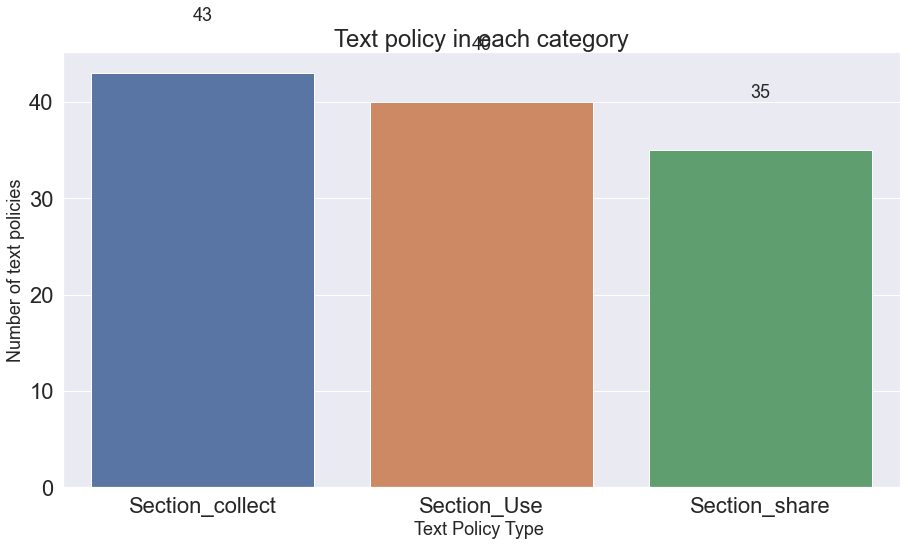

In [9]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,33:].sum().values)

plt.title("Text policy in each category", fontsize=24)
plt.ylabel('Number of text policies', fontsize=18)
plt.xlabel('Text Policy Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,33:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

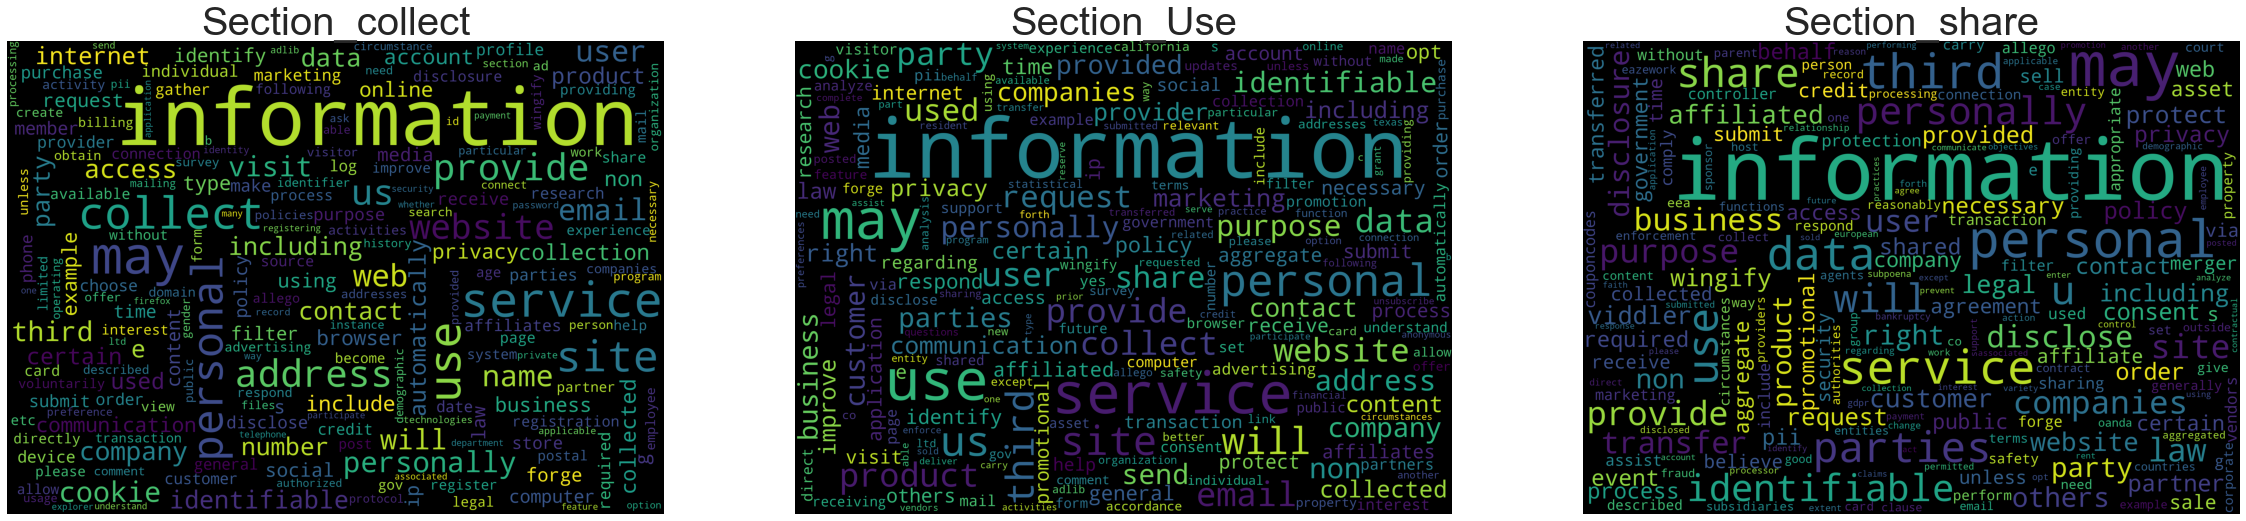

In [10]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

#Section collect
subset = data_raw[data_raw.Section_collect==1]
text = subset.list_of_sections.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Section_collect",fontsize=40)
plt.imshow(cloud_toxic)


# Section use
subset = data_raw[data_raw.Section_Use==1]
text = subset.list_of_sections.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Section_Use",fontsize=40)
plt.imshow(cloud_severe_toxic)


# Section share
subset = data_raw[data_raw.Section_share==1]
text = subset.list_of_sections.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Section_share",fontsize=40)
plt.imshow(cloud_obscene)


plt.show()

## 2. Data Pre-Processing

In [11]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 36)

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Cleaning Data

In [13]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [14]:
data['list_of_sections'] = data['list_of_sections'].str.lower()
data['list_of_sections'] = data['list_of_sections'].apply(cleanHtml)
data['list_of_sections'] = data['list_of_sections'].apply(cleanPunc)
data['list_of_sections'] = data['list_of_sections'].apply(keepAlpha)
data.head()

,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,sha1,simhash,id,domain,categories,rank,list_of_sections,Section_collect,Section_Use,Section_share
41,389984,121062,https://web.archive.org/web/20090401014719id_/...,https://web.archive.org/web/20090616132824id_/...,viddler.com/privacy-policy,https://web.archive.org/web/20090401014719id_/...,2009,A,138714,308728,...,e10218e00ff563daf90a0c8ac8f6ed1d229a9f13,783834004508717384,121062,viddler.com,business,2715.0,third party advertisers viddler may work with ...,0,0,0
194,925121,25455,https://web.archive.org/web/20100412150550id_/...,https://web.archive.org/web/20100316191241id_/...,cougarlife.com/privacy-policy.html,https://web.archive.org/web/20100412150550id_/...,2010,A,293448,729626,...,3a49ad7002ba3ae3e401207835596f9c9bb176fd,14829986689500580781,25455,cougarlife.com,personals,16701.0,what information is collected we collect two t...,1,0,0
116,729245,58966,https://web.archive.org/web/20151004012107id_/...,https://web.archive.org/web/20151206112453id_/...,islandrecords.com/privacy,https://web.archive.org/web/20151004012107id_/...,2015,B,239100,579392,...,d7e43a3d5463093ea62082348a6d82a62287dff9,15885897551595430330,58966,islandrecords.com,business;entertainment,NaN,links we may provide links to non universal mu...,0,0,0
420,916992,24168,https://web.archive.org/web/20150929065509id_/...,https://web.archive.org/web/20151227070655id_/...,comicrelief.com/privacy-policy?tabs-0-row1_col...,https://web.archive.org/web/20150929065509id_/...,2015,B,291172,723228,...,ebaf574dc0afc3be889022a6ae191a92dad44b34,14470544951690070291,24168,comicrelief.com,business;education,718822.0,cookies cookies are small pieces of informatio...,0,0,0
131,736293,60289,https://web.archive.org/web/20101003151129id_/...,https://web.archive.org/web/20101123214123id_/...,jewelosco.com/about/security-privacy.jsp,https://web.archive.org/web/20101003151129id_/...,2010,B,2492,585057,...,471147bd6324ada544c837b519656b730aa405e0,691254518160410565,60289,jewelosco.com,shopping,131411.0,our use of personal information we may use you...,0,1,0


### Removing Stop Words

In [15]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['list_of_sections'] = data['list_of_sections'].apply(removeStopWords)
data.head()

,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,sha1,simhash,id,domain,categories,rank,list_of_sections,Section_collect,Section_Use,Section_share
41,389984,121062,https://web.archive.org/web/20090401014719id_/...,https://web.archive.org/web/20090616132824id_/...,viddler.com/privacy-policy,https://web.archive.org/web/20090401014719id_/...,2009,A,138714,308728,...,e10218e00ff563daf90a0c8ac8f6ed1d229a9f13,783834004508717384,121062,viddler.com,business,2715.0,third party advertisers viddler work allow ...,0,0,0
194,925121,25455,https://web.archive.org/web/20100412150550id_/...,https://web.archive.org/web/20100316191241id_/...,cougarlife.com/privacy-policy.html,https://web.archive.org/web/20100412150550id_/...,2010,A,293448,729626,...,3a49ad7002ba3ae3e401207835596f9c9bb176fd,14829986689500580781,25455,cougarlife.com,personals,16701.0,information collected collect types infor...,1,0,0
116,729245,58966,https://web.archive.org/web/20151004012107id_/...,https://web.archive.org/web/20151206112453id_/...,islandrecords.com/privacy,https://web.archive.org/web/20151004012107id_/...,2015,B,239100,579392,...,d7e43a3d5463093ea62082348a6d82a62287dff9,15885897551595430330,58966,islandrecords.com,business;entertainment,NaN,links provide links non universal music gro...,0,0,0
420,916992,24168,https://web.archive.org/web/20150929065509id_/...,https://web.archive.org/web/20151227070655id_/...,comicrelief.com/privacy-policy?tabs-0-row1_col...,https://web.archive.org/web/20150929065509id_/...,2015,B,291172,723228,...,ebaf574dc0afc3be889022a6ae191a92dad44b34,14470544951690070291,24168,comicrelief.com,business;education,718822.0,cookies cookies small pieces information f...,0,0,0
131,736293,60289,https://web.archive.org/web/20101003151129id_/...,https://web.archive.org/web/20101123214123id_/...,jewelosco.com/about/security-privacy.jsp,https://web.archive.org/web/20101003151129id_/...,2010,B,2492,585057,...,471147bd6324ada544c837b519656b730aa405e0,691254518160410565,60289,jewelosco.com,shopping,131411.0,use personal information use personal inf...,0,1,0


### Stemming

In [16]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['list_of_sections'] = data['list_of_sections'].apply(stemming)
data.head()

,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,sha1,simhash,id,domain,categories,rank,list_of_sections,Section_collect,Section_Use,Section_share
41,389984,121062,https://web.archive.org/web/20090401014719id_/...,https://web.archive.org/web/20090616132824id_/...,viddler.com/privacy-policy,https://web.archive.org/web/20090401014719id_/...,2009,A,138714,308728,...,e10218e00ff563daf90a0c8ac8f6ed1d229a9f13,783834004508717384,121062,viddler.com,business,2715.0,third parti advertis viddler work allow compan...,0,0,0
194,925121,25455,https://web.archive.org/web/20100412150550id_/...,https://web.archive.org/web/20100316191241id_/...,cougarlife.com/privacy-policy.html,https://web.archive.org/web/20100412150550id_/...,2010,A,293448,729626,...,3a49ad7002ba3ae3e401207835596f9c9bb176fd,14829986689500580781,25455,cougarlife.com,personals,16701.0,inform collect collect type inform person iden...,1,0,0
116,729245,58966,https://web.archive.org/web/20151004012107id_/...,https://web.archive.org/web/20151206112453id_/...,islandrecords.com/privacy,https://web.archive.org/web/20151004012107id_/...,2015,B,239100,579392,...,d7e43a3d5463093ea62082348a6d82a62287dff9,15885897551595430330,58966,islandrecords.com,business;entertainment,NaN,link provid link non univers music group site ...,0,0,0
420,916992,24168,https://web.archive.org/web/20150929065509id_/...,https://web.archive.org/web/20151227070655id_/...,comicrelief.com/privacy-policy?tabs-0-row1_col...,https://web.archive.org/web/20150929065509id_/...,2015,B,291172,723228,...,ebaf574dc0afc3be889022a6ae191a92dad44b34,14470544951690070291,24168,comicrelief.com,business;education,718822.0,cooki cooki small piec inform form text file s...,0,0,0
131,736293,60289,https://web.archive.org/web/20101003151129id_/...,https://web.archive.org/web/20101123214123id_/...,jewelosco.com/about/security-privacy.jsp,https://web.archive.org/web/20101003151129id_/...,2010,B,2492,585057,...,471147bd6324ada544c837b519656b730aa405e0,691254518160410565,60289,jewelosco.com,shopping,131411.0,use person inform use person inform varieti pu...,0,1,0


### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 36)
(600, 36)


In [18]:
train_text = train['list_of_sections']
test_text = test['list_of_sections']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [20]:
x_train = vectorizer.transform(train_text)
y_train = data.iloc[:, 33:]

x_test = vectorizer.transform(test_text)
y_test = data.iloc[:, 33:]

In [21]:
print(y_test)

     Section_collect  Section_Use  Section_share
41                 0            0              0
194                1            0              0
116                0            0              0
420                0            0              0
131                0            1              0
..               ...          ...            ...
75                 0            0              0
138                0            0              0
83                 0            0              0
264                0            1              0
192                0            0              0

[2000 rows x 3 columns]


## Multi-Label Classification

### Multiple Binary Classifications - (One Vs All Classifier)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [23]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} policy text...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing Section_collect policy text...**

Test accuracy is 0.935




**Processing Section_Use policy text...**

Test accuracy is 0.9416666666666667




**Processing Section_share policy text...**

Test accuracy is 0.9383333333333334


CPU times: user 39.4 ms, sys: 119 ms, total: 159 ms
Wall time: 2.01 s
